#YouTube prediction

Predicting like to view ratio of YouTube videos using regression.

**About the dataset:**

train dataset = used for modelling, consist of 20 columns and 92275 rows.

test dataset = target for model application, consist of 16 columns and 5800 rows.

**Variables**
1. id

  Unique Identifier for the row (combindation of video id and trending date)

2. video_id 

  Unique Identifier for the video
3. title

  Title of the Video
4. publishedAt

  Datetime the video was published
5. channelId
  
  Id of the channel hosting the video
6. channelTitle

  Title of the channel hosting the video
7. categoryId

  Video category
8. trending_date
  
  Date on which we are predicting the view count
9. tags
  
  Video Tags
10. view_count
  
  Number of views as of the trending date
11. thumbnail_link
  
  Link to the thumbnail of the video.
12. comments_disabled 
  
  True/False if comments are disabled.
13. ratings_disabled
  
  True/False if ratings are disabled.
14. duration_seconds
  
  The duration of the video.
15. has_thumbnail
  
  True/False if the thumbnail is available for the video.
16. description
  
  Video description
17. likes
  
  Number of likes as of the trending date, **Not provided in the test set**
18. dislikes
  
  Number of dislikes, **Not provided in the test set**
19. comment_count 
  
  Comment Count **Not provided in the test set**
20. target TARGET COLUMN 
  
  ratio of like to view


**Process**

Data cleaning
- No duplicated video
- Keep data with null value in 'tags' and 'description' collumn
- Imputation with median for null value in 'duration' collumn
- No outlier handling
- Remove data with 'rating_disabled'
- Keep data with 'comment_disabled'

Feature engineering
- Change date into ordinal
- Add days published collumn (number of days since published)
- Add 'category' summary collumn
- Change 'tag' and 'description' into boolean
- removed collumn with object datatype (thumbnail_link, id, video_id, title, channelId, channeltitle)

Modelling
- train test split with test size 20%
- trying regressor model of LightGBM, XGBoost, Linear Regression, Decision Tree, Random Forest.
- XGboost has best performance
- Tuning the XGboost model improve 30% performance

**Result**

Model can predict the target variable with r2 score = 0.8413.
Shorts video has higher Like to View ratio. The ratio will decrease after being published and then become stable.

#Data preparation

## import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_parquet('drive/MyDrive/DS13/youtube_train.parquet')
test = pd.read_parquet('drive/MyDrive/DS13/youtube_test.parquet')

In [ ]:
train

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,3C66w5Z0ixs_2020-08-12,NaN,True,0.103596
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",M9Pmf9AB4Mo_2020-08-12,NaN,True,0.061611
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,J78aPJ3VyNs_2020-08-12,NaN,True,0.173523
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,kXLn3HkpjaA_2020-08-12,NaN,True,0.046804
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,VIUo6yapDbc_2020-08-12,NaN,True,0.040753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92270,H1tQhK0n5Qk,thanks for 5 million,2021-11-23 19:13:46+00:00,UCSUf5_EPEfl4zlBKZHkZdmw,Danny Gonzalez,23,2021-11-30,danny gonzalez|funny|commentary|comedy|react|r...,536056,109352,550,4374,https://i.ytimg.com/vi/H1tQhK0n5Qk/default.jpg,False,False,#shorts,H1tQhK0n5Qk_2021-11-30,59.0,True,0.203994
92271,3CuO39VL3rk,Mrs. Rogers done F’ed up😅 #shorts #story #come...,2021-11-24 23:48:37+00:00,UCqseWqrl7r-hNoWme7hIfTw,Rebecca Rogers (Mrs. Rogers),23,2021-11-30,[None],863236,116742,1161,583,https://i.ytimg.com/vi/3CuO39VL3rk/default.jpg,False,False,None,3CuO39VL3rk_2021-11-30,58.0,True,0.135238
92272,qfDVsuwg0TU,MY NEW KITCHEN REVEAL!!!!! EXCITING,2021-11-23 22:50:19+00:00,UCnB4LOZe6Dc5JUH9EoaHhKQ,Bri & Fern,1,2021-11-30,10-19-21,194119,14569,180,5276,https://i.ytimg.com/vi/qfDVsuwg0TU/default.jpg,False,False,Contracter email: Los3topetes@gmail.comFOLLOW ...,qfDVsuwg0TU_2021-11-30,824.0,True,0.075052
92273,HHbF8HaC4w8,Using Reverse Psychology To Get ANYTHING You Want,2021-11-21 21:15:16+00:00,UCQNDoTI2g7_daH6zL_9rvWg,Amyy Woahh,23,2021-11-30,[None],24584472,1457618,61893,3610,https://i.ytimg.com/vi/HHbF8HaC4w8/default.jpg,False,False,None,HHbF8HaC4w8_2021-11-30,56.0,True,0.059290


In [ ]:
test

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
0,_wNsZEqpKUA,"Billie Eilish: Same Interview, The Fifth Year ...",2021-11-30 17:00:10+00:00,UCIsbLox_y9dCIMLd8tdC6qg,Vanity Fair,24,2021-12-01,billie|billie eilish|billie eilish 2021|billie...,https://i.ytimg.com/vi/_wNsZEqpKUA/default.jpg,False,False,I'm so much more open to stuff now. On the ver...,_wNsZEqpKUA_2021-12-01,1335.0,True,True
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True
2,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30 15:01:34+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-01,[None],https://i.ytimg.com/vi/F1Hq8eVOMHs/default.jpg,False,False,"The first 1,000 people to use this link will g...",F1Hq8eVOMHs_2021-12-01,728.0,True,True
3,GQXVQmcGQUY,Things Get Strange With The UnderTaker | Cold ...,2021-11-30 16:00:27+00:00,UCLRmIdRJgLfmdpJufmBhBuA,LOL Network,23,2021-12-01,kevin hart|hartbeat productions|funny|comedy|c...,https://i.ytimg.com/vi/GQXVQmcGQUY/default.jpg,False,False,#PoweredByOldSpice Thought by many as one of t...,GQXVQmcGQUY_2021-12-01,829.0,True,True
4,n4XojTb6pfs,People Pleasers at a Restaurant,2021-11-30 17:15:02+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/n4XojTb6pfs/default.jpg,False,False,I apologize for existing - please throw me out...,n4XojTb6pfs_2021-12-01,31.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,hJfpCXAMYPM,a fan was really sad.. So I Surprised Him With...,2021-12-22 19:29:11+00:00,UCilwZiBBfI9X6yiZRzWty8Q,FaZe Rug,24,2021-12-30,faze rug|rug|rugfaze|fazerug,https://i.ytimg.com/vi/hJfpCXAMYPM/default.jpg,False,False,THIS WAS AMAZING!Thanks to Epic Games for spon...,hJfpCXAMYPM_2021-12-30,794.0,True,True
5796,MbmTMEYnEzo,Spider-Man No Way Home Pitch Meeting,2021-12-21 20:15:01+00:00,UC2iUwfYi_1FCGGqhOUNx-iA,Screen Rant,24,2021-12-30,Spider-man|alfred molina|amazing spider-man|an...,https://i.ytimg.com/vi/MbmTMEYnEzo/default.jpg,False,False,Step inside the pitch meeting that led to Spid...,MbmTMEYnEzo_2021-12-30,456.0,True,True
5797,VG7arSAYvQI,BRINGING MAISY HOME!!!,2021-12-21 18:00:11+00:00,UCrbSjN1_5U7hqFKRA0nvFXQ,Colleen Vlogs,24,2021-12-30,colleen|ballinger|colleen ballinger|miranda|si...,https://i.ytimg.com/vi/VG7arSAYvQI/default.jpg,False,False,Check Out My Merch! - https://fanjoy.co/collec...,VG7arSAYvQI_2021-12-30,1010.0,True,True
5798,SNb-g-hNYYs,how i build better than my friend in minecraft...,2021-12-23 15:00:11+00:00,UCkShDLspTnaaiamkpY_UDHg,Beesechurger_73,20,2021-12-30,#minecraft|minecraft|shorts|#shorts|#minecraft...,https://i.ytimg.com/vi/SNb-g-hNYYs/default.jpg,False,False,how i build better than my friend in minecraft...,SNb-g-hNYYs_2021-12-30,24.0,True,True


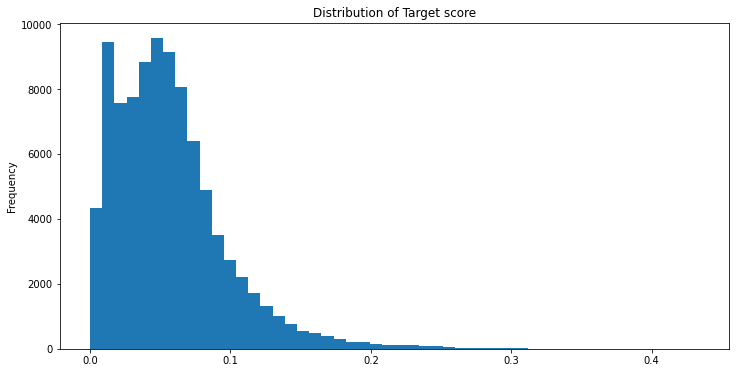

In [ ]:
# histogram target collumn
train['target'].plot.hist(figsize=(12,6),bins=50)
plt.title("Distribution of Target score");

In [ ]:
train.sort_values(by='target')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
76546,tBvx4chqs9s,Eliminatorias Sudamericanas | Argentina 3-0 Bo...,2021-09-10 04:17:05+00:00,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17,2021-09-12,fútbol|pelota|gol|copa|libertadores|sudamerica...,2359887,0,0,3545,https://i.ytimg.com/vi/tBvx4chqs9s/default.jpg,False,True,"En una noche mágica de Messi, con tres goles d...",tBvx4chqs9s_2021-09-12,229.0,True,0.000000
12849,jEd29NY7Yvg,Eliminatorias | Chile vs Colombia | Fecha 2,2020-10-14 03:03:10+00:00,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17,2020-10-15,fútbol|pelota|gol|copa|libertadores|sudamerica...,847113,0,0,3139,https://i.ytimg.com/vi/jEd29NY7Yvg/default.jpg,False,True,Chile 🇨🇱 y Colombia 🇨🇴 igualaron 2-2 en la seg...,jEd29NY7Yvg_2020-10-15,172.0,False,0.000000
76789,tBvx4chqs9s,Eliminatorias Sudamericanas | Argentina 3-0 Bo...,2021-09-10 04:17:05+00:00,UCzU8-lZlRfkV3nj0RzAZdrQ,CONMEBOL,17,2021-09-13,fútbol|pelota|gol|copa|libertadores|sudamerica...,2514953,0,0,3668,https://i.ytimg.com/vi/tBvx4chqs9s/default.jpg,False,True,"En una noche mágica de Messi, con tres goles d...",tBvx4chqs9s_2021-09-13,229.0,True,0.000000
70199,_y9vYoBfVAY,Join the BTS #PermissiontoDance Challenge only...,2021-08-06 00:33:36+00:00,UCBR8-60-B28hp2BmDPdntcQ,YouTube,27,2021-08-11,[None],55229277,0,0,2,https://i.ytimg.com/vi/_y9vYoBfVAY/default.jpg,False,True,Dance your 💜 out to the new BTS song #Permissi...,_y9vYoBfVAY_2021-08-11,16.0,True,0.000000
27669,k5XukvUA1Nk,Kylie Jenner: Christmas Decorations 2020,2020-12-26 04:07:01+00:00,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2021-01-01,[None],8451537,0,0,14799,https://i.ytimg.com/vi/k5XukvUA1Nk/default.jpg,False,True,Stormi and I take you on a tour of my Christma...,k5XukvUA1Nk_2021-01-01,267.0,True,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15010,Vd9QkWsd5p4,TXT (투모로우바이투게더) '5시 53분의 하늘에서 발견한 너와 나' Offici...,2020-10-26 09:00:02+00:00,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,2020-10-26,투모로우바이투게더|TOMORROW X TOGETHER|TXT|수빈|연준|범규|태현|...,3443659,1241887,5944,117973,https://i.ytimg.com/vi/Vd9QkWsd5p4/default.jpg,False,False,TXT (투모로우바이투게더) '5시 53분의 하늘에서 발견한 너와 나' Offici...,Vd9QkWsd5p4_2020-10-26,304.0,True,0.360630
18003,9P4bMIDpWXw,IT'S MY BIRTHDAY SO YOU HAVE TO CLICK ON THIS ...,2020-11-09 23:45:38+00:00,UCiYcA0gJzg855iSKMrX3oHg,CoryxKenshin,20,2020-11-11,its|my|birthday|so|you|have|to|click|on|this|v...,1905875,707447,2851,147920,https://i.ytimg.com/vi/9P4bMIDpWXw/default.jpg,False,False,"For real though, thank you all so much for the...",9P4bMIDpWXw_2020-11-11,405.0,True,0.371193
13831,NEpKlsUw9XU,ghost + guest 👻🎶,2020-10-19 19:18:54+00:00,UCdkkQvJoB0kGgYHCYwSkdww,Louie Zong,1,2020-10-20,[None],112370,41984,22,2336,https://i.ytimg.com/vi/NEpKlsUw9XU/default.jpg,False,False,yes! they are back! and with a new friend!,NEpKlsUw9XU_2020-10-20,53.0,True,0.373623
23636,Su9ABA6RcV8,girl in red - two queens in a king sized bed (...,2020-12-10 18:00:10+00:00,UCwlHDQ83jgF1crd6XXzSmIA,girl in red,24,2020-12-11,girl in red|world in red|do you listen to girl...,223450,87340,197,5414,https://i.ytimg.com/vi/Su9ABA6RcV8/default.jpg,False,False,the official video for two queens in a king si...,Su9ABA6RcV8_2020-12-11,191.0,True,0.390870


## duplicated value

In [ ]:
# check duplicated video id in train dataset
train[train['video_id'].duplicated()==True].sort_values('video_id')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
58906,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-14,Migos|Avalanche|Quality|Control|Music/Motown|R...,5726392,247336,3627,15890,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,--14w5SOEUs_2021-06-14,239.0,True,0.043192
59169,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-15,Migos|Avalanche|Quality|Control|Music/Motown|R...,6553613,258885,3977,16296,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,--14w5SOEUs_2021-06-15,239.0,True,0.039503
58647,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-13,Migos|Avalanche|Quality|Control|Music/Motown|R...,4690242,232455,3145,15743,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,--14w5SOEUs_2021-06-13,239.0,True,0.049561
58434,--14w5SOEUs,Migos - Avalanche (Official Video),2021-06-10 16:00:00+00:00,UCGIelM2Dj3zza3xyV3pL3WQ,MigosVEVO,10,2021-06-12,Migos|Avalanche|Quality|Control|Music/Motown|R...,3317372,202153,2518,14721,https://i.ytimg.com/vi/--14w5SOEUs/default.jpg,False,False,Watch the the official video for Migos - Avala...,--14w5SOEUs_2021-06-12,239.0,True,0.060938
78760,--40TEbZ9Is,Supporting Actress in a Comedy: 73rd Emmys,2021-09-20 01:03:32+00:00,UClBKH8yZRcM4AsRjDVEdjMg,Television Academy,24,2021-09-23,[None],638046,7548,362,699,https://i.ytimg.com/vi/--40TEbZ9Is/default.jpg,False,False,Hannah Waddingham wins the Emmy for Supporting...,--40TEbZ9Is_2021-09-23,309.0,True,0.011830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57784,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-08,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,9006838,557348,3238,74611,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,zzk09ESX7e0_2021-06-08,266.0,True,0.061881
56858,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-04,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,3340184,402591,1905,58060,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,zzk09ESX7e0_2021-06-04,266.0,True,0.120530
58011,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-09,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,9267897,576724,3356,76522,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,zzk09ESX7e0_2021-06-09,266.0,True,0.062228
57065,zzk09ESX7e0,[MV] 마마무 (MAMAMOO) - Where Are We Now,2021-06-02 09:00:10+00:00,UCuhAUMLzJxlP1W7mEk0_6lA,MAMAMOO,10,2021-06-05,MAMAMOO|마마무|WAW|마마무 WAW|MAMAMOO WAW|Where Are ...,5671761,452770,2499,65318,https://i.ytimg.com/vi/zzk09ESX7e0/default.jpg,False,False,[MV] 마마무 (MAMAMOO) - Where Are We Now\r\rInsta...,zzk09ESX7e0_2021-06-05,266.0,True,0.079829


Plenty of same video but different trending date. Also the number of view_count,likes, dislikes, comment_count	of that video is different. 

Looks like the video in the dataset is based on trending date and recorded by day. So, there is a multiple like to view ratio for each videos.

Keep in mind that the uploader can change the video variables.

In [ ]:
# check on test dataset
test[test['video_id'].duplicated()==True].sort_values('video_id')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
1716,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-10,retaining wall|New Jersey highway|Direct Conne...,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,One of the most important (and innocuous) part...,--DKkzWVh-E_2021-12-10,771.0,True,True
1471,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-09,retaining wall|New Jersey highway|Direct Conne...,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,One of the most important (and innocuous) part...,--DKkzWVh-E_2021-12-09,771.0,True,True
1953,--DKkzWVh-E,Why Retaining Walls Collapse,2021-12-07 13:00:00+00:00,UCMOqf8ab-42UUQIdVoKwjlQ,Practical Engineering,27,2021-12-11,retaining wall|New Jersey highway|Direct Conne...,https://i.ytimg.com/vi/--DKkzWVh-E/default.jpg,False,False,One of the most important (and innocuous) part...,--DKkzWVh-E_2021-12-11,771.0,True,True
447,--FmExEAsM8,IVE 아이브 'ELEVEN' MV,2021-12-01 09:00:03+00:00,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,10,2021-12-03,Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...,https://i.ytimg.com/vi/--FmExEAsM8/default.jpg,False,False,IVE Twitter: https://twitter.com/IVEstarship: ...,--FmExEAsM8_2021-12-03,184.0,True,True
969,--FmExEAsM8,IVE 아이브 'ELEVEN' MV,2021-12-01 09:00:03+00:00,UCYDmx2Sfpnaxg488yBpZIGg,starshipTV,10,2021-12-06,Kpop|girl group|1theK|Starshiptv|starship|뮤비|티...,https://i.ytimg.com/vi/--FmExEAsM8/default.jpg,False,False,IVE Twitter: https://twitter.com/IVEstarship: ...,--FmExEAsM8_2021-12-06,184.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,zrDDcOyc9hY,Polo G - Fortnight (Official Video),2021-12-09 02:00:09+00:00,UC0ifXd2AVf1LMYbqwB5GH4g,Polo G,10,2021-12-12,Polo G|PoloG|Hall of Fame|Hall of Fame 2.0|For...,https://i.ytimg.com/vi/zrDDcOyc9hY/default.jpg,False,False,Official video for “Fortnight” by Polo G Liste...,zrDDcOyc9hY_2021-12-12,159.0,True,True
2328,zrDDcOyc9hY,Polo G - Fortnight (Official Video),2021-12-09 02:00:09+00:00,UC0ifXd2AVf1LMYbqwB5GH4g,Polo G,10,2021-12-13,Polo G|PoloG|Hall of Fame|Hall of Fame 2.0|For...,https://i.ytimg.com/vi/zrDDcOyc9hY/default.jpg,False,False,Official video for “Fortnight” by Polo G Liste...,zrDDcOyc9hY_2021-12-13,159.0,True,True
959,zxSkywNLOW0,Lil Tjay - Christmas In A Cell (Official Audio),2021-12-01 21:14:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-12-06,Lil Tjay|Christmas|Santa Claus|Bronx Drill|Bro...,https://i.ytimg.com/vi/zxSkywNLOW0/default.jpg,False,False,Official audio for Christmas In A Cell by Lil ...,zxSkywNLOW0_2021-12-06,214.0,True,True
1197,zxSkywNLOW0,Lil Tjay - Christmas In A Cell (Official Audio),2021-12-01 21:14:49+00:00,UCEB4a5o_6KfjxHwNMnmj54Q,Lil Tjay,10,2021-12-07,Lil Tjay|Christmas|Santa Claus|Bronx Drill|Bro...,https://i.ytimg.com/vi/zxSkywNLOW0/default.jpg,False,False,Official audio for Christmas In A Cell by Lil ...,zxSkywNLOW0_2021-12-07,214.0,True,True


Seems like the test dataset also has the same recording method. so we will keep the duplicated video

In [ ]:
print(f'Duplicated row in train dataset: {train.duplicated().sum()}')
print(f'Duplicated row in test dataset: {test.duplicated().sum()}')

Duplicated row in train dataset: 0
Duplicated row in test dataset: 0


##missing value

**Train dataset**

The data has [None] word in tags collumn, so we will change it into np.Nan

In [ ]:
# check word with [None]
train[train['tags']=='[None]']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
6,uet14uf9NsE,OUR FIRST FAMILY INTRO!!,2020-08-12 00:17:41+00:00,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2020-08-12,[None],470446,47990,440,4558,https://i.ytimg.com/vi/uet14uf9NsE/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,uet14uf9NsE_2020-08-12,NaN,True,0.102010
10,49Z6Mv4_WCA,i don't know what im doing anymore,2020-08-11 20:24:34+00:00,UCtinbF-Q-fVthA0qrFQTgXQ,CaseyNeistat,22,2020-08-12,[None],940036,87111,1860,7052,https://i.ytimg.com/vi/49Z6Mv4_WCA/default.jpg,False,False,ssend love to my sponsor; for a super Limited ...,49Z6Mv4_WCA_2020-08-12,NaN,True,0.092668
31,CezxKs9YLv0,"Here's Why We Do Sponsored Videos, What Are Yo...",2020-08-11 22:41:31+00:00,UCMJbbWyIziiUamP5JKK9yAA,Cleetus2 McFarland,22,2020-08-12,[None],75700,9228,103,7085,https://i.ytimg.com/vi/CezxKs9YLv0/default.jpg,False,False,Figured I'd hop on here and talk to you guys d...,CezxKs9YLv0_2020-08-12,NaN,True,0.121902
37,5V2B28OqfqM,"I Spent $1,000,000 On Lottery Tickets and WON",2020-08-08 20:00:02+00:00,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,2020-08-12,[None],21022916,1297679,22626,76814,https://i.ytimg.com/vi/5V2B28OqfqM/default.jpg,False,False,I didnt think i was going to win that much... ...,5V2B28OqfqM_2020-08-12,NaN,True,0.061727
39,IuMAHR0OtH4,My dog goes swimming for the first time!,2020-08-06 21:30:14+00:00,UC5qM39SKEWXUJxdAMC0JVVA,Sammy The Golden Retriever,22,2020-08-12,[None],324426,7573,358,502,https://i.ytimg.com/vi/IuMAHR0OtH4/default.jpg,False,False,Watch my dog to go swimming for the first time...,IuMAHR0OtH4_2020-08-12,NaN,True,0.023343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92255,TPAoof3GSyE,Glee did NOT age well,2021-11-23 17:00:17+00:00,UCuo9VyowIT-ljA5G2ZuC6Yw,Eddy Burback,23,2021-11-30,[None],1006523,107018,1276,4805,https://i.ytimg.com/vi/TPAoof3GSyE/default.jpg,False,False,Use code EDDY14 for up to 14 FREE MEALS + 3 Fr...,TPAoof3GSyE_2021-11-30,1272.0,True,0.106324
92259,PpF8AaPyqhQ,Java Account Move: A Fun Visit from Dinnerbone,2021-11-24 15:58:10+00:00,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,2021-11-30,[None],638166,53284,948,3762,https://i.ytimg.com/vi/PpF8AaPyqhQ/default.jpg,False,False,"Knock, knock. Who’s there? It’s Dinnerbone, wi...",PpF8AaPyqhQ_2021-11-30,136.0,True,0.083496
92263,YZulBGsCWio,My CRUSH Gives Me The ULTIMATE MAKEOVER!!,2021-11-23 12:39:09+00:00,UCpLcXDC0x516xkamfP3-JHg,Andrew Davila,22,2021-11-30,[None],1730942,107133,2061,7213,https://i.ytimg.com/vi/YZulBGsCWio/default.jpg,False,False,This makeover was crazy! Thank you James and L...,YZulBGsCWio_2021-11-30,750.0,True,0.061893
92271,3CuO39VL3rk,Mrs. Rogers done F’ed up😅 #shorts #story #come...,2021-11-24 23:48:37+00:00,UCqseWqrl7r-hNoWme7hIfTw,Rebecca Rogers (Mrs. Rogers),23,2021-11-30,[None],863236,116742,1161,583,https://i.ytimg.com/vi/3CuO39VL3rk/default.jpg,False,False,None,3CuO39VL3rk_2021-11-30,58.0,True,0.135238


In [ ]:
# replace with NaN
train_clean = train.copy()
train_clean = train.replace('[None]', np.nan)

In [ ]:
# function to get missing value summary
def missing_data(data):
    miss1 = pd.DataFrame(data.isnull().sum()).reset_index()
    miss1.columns = ['Column', 'Total_missing']
    miss1 = miss1[miss1['Total_missing']>0].reset_index(drop=True)
    miss1['Percentage'] = round(miss1['Total_missing']/data.shape[0]*100, 2)
    missing_columns = list(miss1['Column'])
    tipe = []
    contoh = []
    for kolom in missing_columns:
        tipe.append(data[kolom].dtype)
        contoh.append(data[kolom][4])
    miss1['Data_type'] = tipe
    miss1['Example'] = contoh
    return miss1

In [ ]:
# using the function
missing_train = missing_data(train_clean)

In [ ]:
# missing value in train dataset
missing_train

,Column,Total_missing,Percentage,Data_type,Example
0,tags,13590,14.73,object,The LaBrant Family|DIY|Interior Design|Makeove...
1,description,1476,1.60,object,Transforming The LaBrant Family's empty white ...
2,duration_seconds,2176,2.36,float64,NaN


Seems like the NaN value in tags and description show that the video doesnt fill that column, so we will leave it. For the duration_seconds we will impute with median 

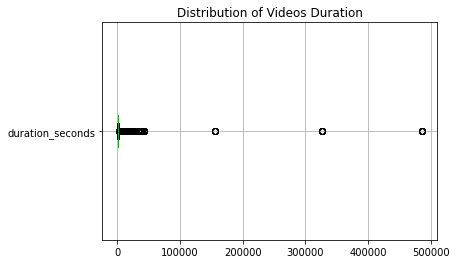

In [ ]:
# Video duration does not have normal distribution
train_clean.boxplot(column='duration_seconds',vert=False)
plt.title('Distribution of Videos Duration');

In [ ]:
# imputation with median
train_clean['duration_seconds'].fillna(train_clean['duration_seconds'].median(), inplace=True)

**Test dataset**

In [ ]:
# check 'None' in test dataset
test[test['tags']=='[None]']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,isTest
1,2jfbXZiE6Lc,Redneck vs Fancy Whiskey Glass,2021-11-29 21:30:27+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/2jfbXZiE6Lc/default.jpg,False,False,I’m just shocked Brad was able to sell him in ...,2jfbXZiE6Lc_2021-12-01,28.0,True,True
2,F1Hq8eVOMHs,Is Meat Really that Bad?,2021-11-30 15:01:34+00:00,UCsXVk37bltHxD1rDPwtNM8Q,Kurzgesagt – In a Nutshell,27,2021-12-01,[None],https://i.ytimg.com/vi/F1Hq8eVOMHs/default.jpg,False,False,"The first 1,000 people to use this link will g...",F1Hq8eVOMHs_2021-12-01,728.0,True,True
4,n4XojTb6pfs,People Pleasers at a Restaurant,2021-11-30 17:15:02+00:00,UCT_QEGH0myu6lgbE_biQPuw,Drew Talbert,23,2021-12-01,[None],https://i.ytimg.com/vi/n4XojTb6pfs/default.jpg,False,False,I apologize for existing - please throw me out...,n4XojTb6pfs_2021-12-01,31.0,True,True
6,qQsHZ87Q8uI,why can't you curse? #shorts,2021-11-30 17:00:26+00:00,UCK7mk2tt1FtBs5VqocHQtzg,Alex Griswold,24,2021-12-01,[None],https://i.ytimg.com/vi/qQsHZ87Q8uI/default.jpg,False,False,None,qQsHZ87Q8uI_2021-12-01,24.0,True,True
7,vdrn4ouZRvQ,Minecraft Caves & Cliffs Update: Part II - Off...,2021-11-30 16:00:34+00:00,UC1sELGmy5jp5fQUugmuYlXQ,Minecraft,20,2021-12-01,[None],https://i.ytimg.com/vi/vdrn4ouZRvQ/default.jpg,False,False,"Scale bigger mountains, unearth elaborate cave...",vdrn4ouZRvQ_2021-12-01,110.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5749,Yt9A0YT0SK4,MY MOST VIEWED TIKTOK OF 2021: KOREAN MOM TRIE...,2021-12-22 08:00:12+00:00,UCWc8CackfCo4q46FpEWBcPg,Jeenie.Weenie,23,2021-12-30,[None],https://i.ytimg.com/vi/Yt9A0YT0SK4/default.jpg,False,False,Thank you for all the laughs in 2021!!! Lookin...,Yt9A0YT0SK4_2021-12-30,30.0,True,True
5752,9PPMpy_PPvE,DONT BE THIS GUY *FACE PALM*🤦🏼‍♂️,2021-12-22 20:00:02+00:00,UCKn9pudfpQHb2pY54ykCocQ,Chance Dubinick,24,2021-12-30,[None],https://i.ytimg.com/vi/9PPMpy_PPvE/default.jpg,False,False,None,9PPMpy_PPvE_2021-12-30,49.0,True,True
5765,FT9HNUqJk6g,The PETTY Life of 50 Cent 👑 | #shorts,2021-12-24 03:53:18+00:00,UC6y-grwEU6hUrhuv5auzP9Q,Broadcast Boys Shorts,17,2021-12-30,[None],https://i.ytimg.com/vi/FT9HNUqJk6g/default.jpg,False,False,None,FT9HNUqJk6g_2021-12-30,57.0,False,True
5779,cYX2_lDYZpI,John Wick: Chapter 4 (2023 Movie) Announcement,2021-12-22 20:30:01+00:00,UCJ6nMHaJPZvsJ-HmUmj1SeA,Lionsgate Movies,1,2021-12-30,[None],https://i.ytimg.com/vi/cYX2_lDYZpI/default.jpg,False,False,Be seeing you. 3.24.23.Subscribe to the LIONSG...,cYX2_lDYZpI_2021-12-30,23.0,True,True


In [ ]:
# change into NaN
test_clean = test.copy()
test_clean = test.replace('[None]', np.nan)

we will do the same treatment to the test dataset

In [ ]:
# missing value in test dataset
missing_test = missing_data(test_clean)
missing_test

,Column,Total_missing,Percentage,Data_type,Example
0,tags,1341,23.12,object,NaN
1,description,409,7.05,object,I apologize for existing - please throw me out...
2,duration_seconds,20,0.34,float64,31.0


In [ ]:
# imputation with median
test['duration_seconds'].fillna(test['duration_seconds'].median(), inplace=True)

##outlier

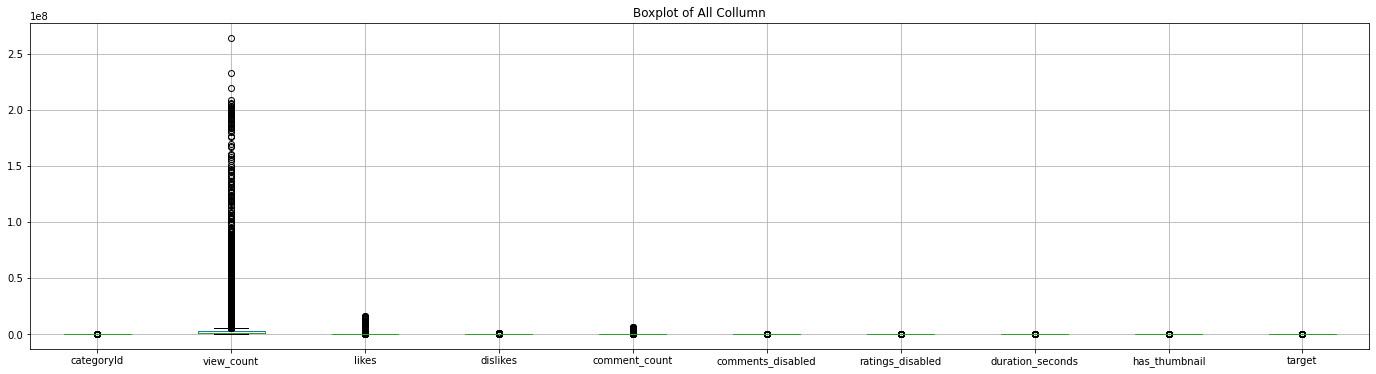

In [ ]:
# boxplot of train dataset
train_clean.boxplot(figsize=(24,6))
plt.title('Boxplot of All Collumn');

Since there is plenty of outlier, we will not remove the outlier

##Rating

In [ ]:
# check video with rating disabled
train_clean[train_clean['ratings_disabled']==True]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
1224,rZUTFDjDZSQ,The Paris Hilton you never knew | This Is Pari...,2020-08-17 16:00:13+00:00,UCwl5c3q0uBK3mVv9OXQUeeQ,Paris Hilton,24,2020-08-18,Paris Hilton|Paris|Hilton|Documentary|This Is ...,330188,0,0,1362,https://i.ytimg.com/vi/rZUTFDjDZSQ/default.jpg,False,True,"This September 14th, meet the real Paris Hilto...",rZUTFDjDZSQ_2020-08-18,126.0,True,0.0
1286,b8pSdMHicYw,What Really Happened to Sean O'Malley vs Marlo...,2020-08-16 05:30:01+00:00,UCQ2xsPeC159i2RzHAme1gmg,kenanK TV,17,2020-08-18,sean o malley|sean o'malley|ufc 252|ufc 252 se...,391246,0,0,969,https://i.ytimg.com/vi/b8pSdMHicYw/default.jpg,False,True,In Sean O'malley's fight against Marlon Chito ...,b8pSdMHicYw_2020-08-18,484.0,True,0.0
1439,RHPRUe-aZHA,SuperM 슈퍼엠 '100' MV Reaction,2020-08-18 15:00:17+00:00,UCcjV926qiLr_Ghw6A0lTNjA,SuperM,10,2020-08-19,NaN,958787,0,0,8314,https://i.ytimg.com/vi/RHPRUe-aZHA/default.jpg,False,True,SuperM's new single “100” is out!🎧Listen and d...,RHPRUe-aZHA_2020-08-19,389.0,True,0.0
1455,rZUTFDjDZSQ,The Paris Hilton you never knew | This Is Pari...,2020-08-17 16:00:13+00:00,UCwl5c3q0uBK3mVv9OXQUeeQ,Paris Hilton,24,2020-08-19,Paris Hilton|Paris|Hilton|Documentary|This Is ...,600752,0,0,1898,https://i.ytimg.com/vi/rZUTFDjDZSQ/default.jpg,False,True,"This September 14th, meet the real Paris Hilto...",rZUTFDjDZSQ_2020-08-19,126.0,True,0.0
1529,b8pSdMHicYw,What Really Happened to Sean O'Malley vs Marlo...,2020-08-16 05:30:01+00:00,UCQ2xsPeC159i2RzHAme1gmg,kenanK TV,17,2020-08-19,sean o malley|sean o'malley|ufc 252|ufc 252 se...,396636,0,0,947,https://i.ytimg.com/vi/b8pSdMHicYw/default.jpg,False,True,In Sean O'malley's fight against Marlon Chito ...,b8pSdMHicYw_2020-08-19,484.0,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90542,tE3p5L98CW0,Jury finds Kyle Rittenhouse not guilty on all ...,2021-11-19 18:21:35+00:00,UCXIJgqnII2ZOINSWNOGFThA,Fox News,25,2021-11-21,Fox News Channel|Fox News|News|live|live strea...,1531148,0,0,0,https://i.ytimg.com/vi/tE3p5L98CW0/default.jpg,True,True,The jury will announce the verdict in Kyle Rit...,tE3p5L98CW0_2021-11-21,393.0,True,0.0
90653,mfgiRRat3Os,"Bellingham, Washington Flooding: November 15th...",2021-11-16 02:29:33+00:00,UCtKY2DeY9GkBr35opV7E2Lg,"City of Bellingham, Washington",27,2021-11-21,flooding|climate change,212582,0,0,0,https://i.ytimg.com/vi/mfgiRRat3Os/default.jpg,True,True,"Flooding on Iowa St, Squalicum Creek Park, and...",mfgiRRat3Os_2021-11-21,219.0,True,0.0
90781,tE3p5L98CW0,Jury finds Kyle Rittenhouse not guilty on all ...,2021-11-19 18:21:35+00:00,UCXIJgqnII2ZOINSWNOGFThA,Fox News,25,2021-11-22,Fox News Channel|Fox News|News|live|live strea...,1551845,0,0,0,https://i.ytimg.com/vi/tE3p5L98CW0/default.jpg,True,True,The jury will announce the verdict in Kyle Rit...,tE3p5L98CW0_2021-11-22,393.0,True,0.0
91019,tE3p5L98CW0,Jury finds Kyle Rittenhouse not guilty on all ...,2021-11-19 18:21:35+00:00,UCXIJgqnII2ZOINSWNOGFThA,Fox News,25,2021-11-23,Fox News Channel|Fox News|News|live|live strea...,1559774,0,0,0,https://i.ytimg.com/vi/tE3p5L98CW0/default.jpg,True,True,The jury will announce the verdict in Kyle Rit...,tE3p5L98CW0_2021-11-23,393.0,True,0.0


In [ ]:
# rating disabled summary
train_clean[train_clean['ratings_disabled'] ==True][['likes','dislikes','target']]

,likes,dislikes,target
1224,0,0,0.0
1286,0,0,0.0
1439,0,0,0.0
1455,0,0,0.0
1529,0,0,0.0
...,...,...,...
90542,0,0,0.0
90653,0,0,0.0
90781,0,0,0.0
91019,0,0,0.0


In [ ]:
# number of video with rating disabled
train_clean[train_clean['ratings_disabled']==True].video_id.nunique()

86

We can see that there is 86 video which disabled rating. They have 0 likes, dislikes and target. So we will delete video with rating_disabled since its only a little part of the dataset, and does not contain the target value that we will predict.

In [ ]:
# drop video in train dataset
train_clean.drop(train_clean[train_clean['ratings_disabled'] == True].index, inplace = True)

We will also do the same to test dataset

In [ ]:
# drop video in test dataset
test_clean.drop(test_clean[test_clean['ratings_disabled'] == True].index, inplace = True)

##comment

In [ ]:
# check video with comment disabled
train_clean[train_clean['comments_disabled']==True]

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
53,Tujt4APHPzo,FIRST DAY IN THE NEW HOUSE! Ellie and Jared Mo...,2020-08-11 13:00:29+00:00,UCYv8VkKxvmfYIRbowQALwCw,Ellie and Jared,22,2020-08-12,family life|life vlog|family vlog|ellie and ja...,208173,8810,215,0,https://i.ytimg.com/vi/Tujt4APHPzo/default.jpg,True,False,Come with us as we move into our new home! It ...,Tujt4APHPzo_2020-08-12,830.0,True,0.042321
131,LI1hCQ-6P0Y,AN UMBRELLA ACADEMY UNBOXING,2020-08-08 19:00:11+00:00,UCdrhoWKtC0CVoEvg12HNB-g,AidanRGallagher,24,2020-08-12,NaN,1183833,127487,1588,0,https://i.ytimg.com/vi/LI1hCQ-6P0Y/default.jpg,True,False,This video was NOT sponsored by Dark Horse Com...,LI1hCQ-6P0Y_2020-08-12,247.0,True,0.107690
134,Idp1xvmLPHo,LaBrant Family Baby Boy Name Reveal.,2020-08-08 17:26:41+00:00,UC4-CH0epzZpD_ARhxCx6LaQ,The LaBrant Fam,22,2020-08-12,cole and sav|the labrant fam|labrant fam|the l...,5849640,287811,5040,0,https://i.ytimg.com/vi/Idp1xvmLPHo/default.jpg,True,False,Please continue to keep our baby in your praye...,Idp1xvmLPHo_2020-08-12,1344.0,True,0.049201
242,7osSbbc2xVg,First Day of School GRWM + Vlog | College Edit...,2020-08-11 21:06:52+00:00,UCfwEsuyMCLEd0eLntOEDn0g,LexiVee03,26,2020-08-13,lexivee03|veehive|#veehive|first day of colleg...,260195,17234,213,0,https://i.ytimg.com/vi/7osSbbc2xVg/default.jpg,True,False,I’m going back to school! Join me on my first ...,7osSbbc2xVg_2020-08-13,1493.0,False,0.066235
276,Tujt4APHPzo,FIRST DAY IN THE NEW HOUSE! Ellie and Jared Mo...,2020-08-11 13:00:29+00:00,UCYv8VkKxvmfYIRbowQALwCw,Ellie and Jared,22,2020-08-13,family life|life vlog|family vlog|ellie and ja...,238369,9701,233,0,https://i.ytimg.com/vi/Tujt4APHPzo/default.jpg,True,False,Come with us as we move into our new home! It ...,Tujt4APHPzo_2020-08-13,830.0,True,0.040697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91755,reEiGS35Iuc,Minecraft Copper Golem Morphing,2021-11-21 18:34:04+00:00,UCSNdcYGyingAO7fvWIYYTSQ,TechnoRIDE,20,2021-11-27,Minecraft|Technoblade|Dreamsmp|dreamsmp|Dream|...,1014300,57111,3495,0,https://i.ytimg.com/vi/reEiGS35Iuc/default.jpg,True,False,⭐Check out my channel OVERRIDE : https://www....,reEiGS35Iuc_2021-11-27,23.0,True,0.056306
91870,2RWiaDgKDrQ,Kyle Rittenhouse verdict: Defense attorney Mar...,2021-11-19 20:14:12+00:00,UCzHN-FjWDMsgfGPvRq7oy-Q,FOX6 News Milwaukee,25,2021-11-27,News|FOX6|FOX6 News|FOX6 News Milwaukee|Milwau...,1762813,44056,2149,0,https://i.ytimg.com/vi/2RWiaDgKDrQ/default.jpg,True,False,Kyle Rittenhouse defense attorney Mark Richard...,2RWiaDgKDrQ_2021-11-27,822.0,True,0.024992
92015,Yfr4s_uHcFg,GRM *are me and Justin still together *,2021-11-24 02:32:08+00:00,UCvqdTowktwavf26GJpU6OtA,Brooklyn Frost,22,2021-11-29,Brooklyn|funny|friendly|cute|grm|trendy|hot|new,341783,23281,1170,0,https://i.ytimg.com/vi/Yfr4s_uHcFg/default.jpg,True,False,None,Yfr4s_uHcFg_2021-11-29,733.0,False,0.068116
92032,reEiGS35Iuc,Minecraft Copper Golem Morphing,2021-11-21 18:34:04+00:00,UCSNdcYGyingAO7fvWIYYTSQ,TechnoRIDE,20,2021-11-29,Minecraft|Technoblade|Dreamsmp|dreamsmp|Dream|...,1019168,57192,3486,0,https://i.ytimg.com/vi/reEiGS35Iuc/default.jpg,True,False,⭐Check out my channel OVERRIDE : https://www....,reEiGS35Iuc_2021-11-29,23.0,True,0.056116


In [ ]:
# comment disabled summary
train_clean[train_clean['comments_disabled'] ==True][['comment_count']]

,comment_count
53,0
131,0
134,0
242,0
276,0
...,...
91755,0
91870,0
92015,0
92032,0


In [ ]:
# number of video with comment disabled
train_clean[train_clean['comments_disabled']==True].video_id.nunique()

247

There are 275 videos which disabled comment. They have 0 comment, since it still have the target collumn, we will keep the data. We can also look into the correlation of disabling comment to like and view ratio

## Feature Engineering

##date

In [ ]:
print(f'Range of uploaded time in train dataset : {train_clean.publishedAt.min()} until {train_clean.publishedAt.max()}')
print(f'Range of uploaded time in test dataset : {test_clean.publishedAt.min()} until {test_clean.publishedAt.max()}')

Range of uploaded time in train dataset : 2020-08-03 21:51:14+00:00 until 2021-11-29 18:50:25+00:00
Range of uploaded time in test dataset : 2021-11-15 17:06:20+00:00 until 2021-12-29 16:42:14+00:00


The published dates in the **train** data are between 2020-08-03 to 2021-11-29. 

The published dates in the **test** data are between 2021-11-15 to 2021-12-29

In [ ]:
# looking into video with most trending time
top_video = train_clean['video_id'].value_counts().index[0]
train_clean.query('video_id ==@top_video').head(1)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,duration_seconds,has_thumbnail,target
62499,hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,2021-07-03 04:04:57+00:00,UCt8z2S30Wl-GQEluFVM8NUw,Fortnite Fun TV,24,2021-07-04,NaN,4473783,190996,11442,120,https://i.ytimg.com/vi/hdmx71UjBXs/default.jpg,False,False,Turn into orbeez - Tutorial #ShortsHey guys! W...,hdmx71UjBXs_2021-07-04,31.0,True,0.042692


In [ ]:
# total days in trending
train_clean['video_id'].value_counts()[0]

36

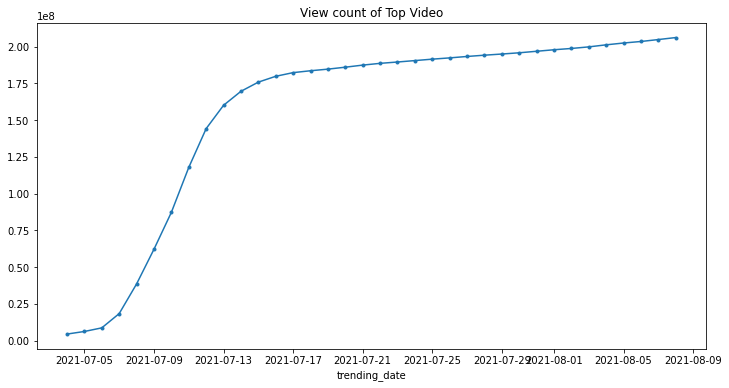

In [ ]:
# Plot view count
train_clean.query('video_id ==@top_video').set_index('trending_date')['view_count'].plot(figsize=(12,6),style='.-',title='View count of Top Video');

the top video is a shorts about Fortnite game that have been trending for 36 days. From the graph we can see that the view count and like to view ratio become stable from 9 days after uploaded.

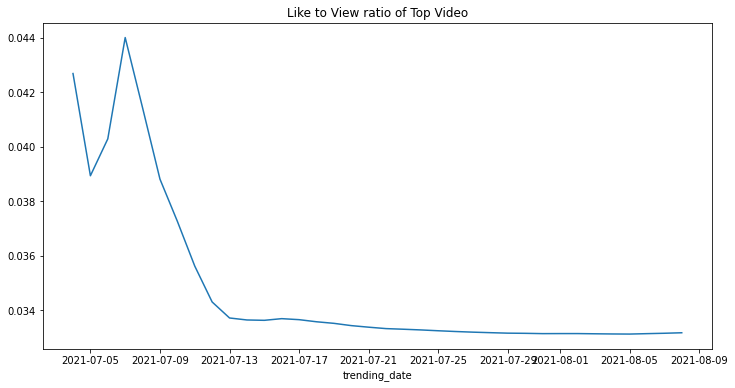

In [ ]:
# target value of top video
train_clean.query('video_id ==@top_video').set_index('trending_date')['target'].plot(figsize=(12,6),title='Like to View ratio of Top Video');

Seems that the videos get more likes near the published day and after a while gets stable. Because of that we will add a new column about the difference between streaming and launched day.

In [ ]:
# formatting to datetime
train_clean['trending_date'] = pd.to_datetime(train_clean['trending_date'],utc=True)
test_clean['trending_date'] = pd.to_datetime(test_clean['trending_date'],utc=True)

In [ ]:
#formatting to ordinal
train_clean['ordinal_trending_date'] = train_clean['trending_date'].map(dt.datetime.toordinal)
test_clean['ordinal_trending_date'] = test_clean['trending_date'].map(dt.datetime.toordinal)

train_clean['ordinal_publish_date'] = train_clean['publishedAt'].map(dt.datetime.toordinal)
test_clean['ordinal_publish_date'] = test_clean['publishedAt'].map(dt.datetime.toordinal)

In [ ]:
# subtract the date
train_clean['days_published']=(train_clean['trending_date'] - train_clean['publishedAt']).dt.days
test_clean['days_published']=(test_clean['trending_date'] - test_clean['publishedAt']).dt.days

## Explore by category

In [ ]:
print(f'Number of category in train set = {train_clean["categoryId"].nunique()}')
print(f'Category in train set= {train_clean["categoryId"].unique()}')
print('---------------------------------------------------')
print(f'Number of category in test set = {test_clean["categoryId"].nunique()}')
print(f'Category in test set = {test_clean["categoryId"].unique()}')

Number of category in train set = 15
Category in train set= [22 20 24 10 26 27 23 28  1 25 17 19 15  2 29]
---------------------------------------------------
Number of category in test set = 13
Category in test set = [24 23 27 20 22 10 28 17 26  1 25  2 19]


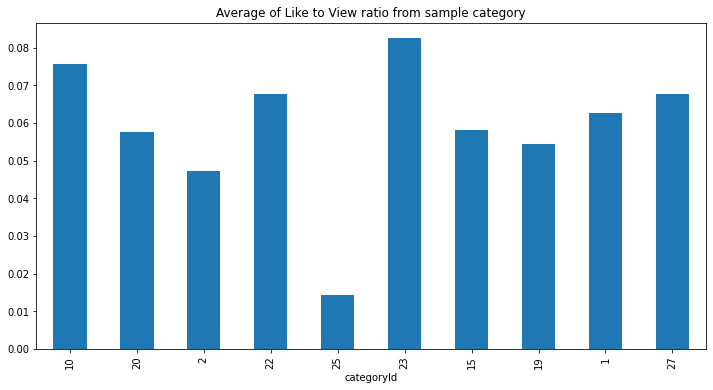

In [ ]:
# plot sample category
train_clean.groupby('categoryId')['target'].mean().sample(10).plot(kind='bar',figsize=(12,6))
plt.title('Average of Like to View ratio from sample category');

Different category has different Like to View ratio, so we will add collumn with numeric data type that represent the category

###Category average

In [ ]:
set(test_clean['categoryId']).difference(train_clean['categoryId'])

set()

All category in test dataset is included in train dataset so we will add category summary

In [ ]:
# new collumn about category in train dataset
train_clean['target_average_category'] = train_clean.groupby('categoryId')['target'].transform('mean')
train_clean['likes_average_category'] = train_clean.groupby('categoryId')['likes'].transform('mean')
train_clean['dislikes_average_category'] = train_clean.groupby('categoryId')['dislikes'].transform('mean')
train_clean['views_average_category'] = train_clean.groupby('categoryId')['view_count'].transform('mean')
train_clean['comment_average_category'] = train_clean.groupby('categoryId')['comment_count'].transform('mean')

In [ ]:
# category summary
cat = train_clean.groupby('categoryId')[['target','likes','dislikes','view_count','comment_count']].mean()
cat.round(4)

,target,likes,dislikes,view_count,comment_count
categoryId,,,,,
1,0.0627,99683.0779,1795.0448,2.186332e+06,8207.0862
2,0.0473,50090.0615,788.5521,1.084007e+06,4356.9717
10,0.0758,319278.1953,6025.8010,4.654300e+06,36911.4804
15,0.0583,60704.9073,785.2540,1.239776e+06,4297.5060
17,0.0215,52634.4720,1496.6657,2.081131e+06,4379.0380
19,0.0545,47817.7818,782.0961,8.278945e+05,3186.9221
20,0.0577,125022.6881,2296.6074,2.271570e+06,10187.0334
22,0.0678,131517.5985,3656.7243,2.161102e+06,8992.7106
23,0.0825,130485.7747,1985.7491,1.901593e+06,7480.8614


In [ ]:
# category summary from train dataset
averages_category = train_clean.groupby(by=['categoryId']).mean('target')['target'].to_dict()
averages_likes_category = train_clean.groupby(by=['categoryId']).mean('likes')['likes'].to_dict()
averages_dislikes_category = train_clean.groupby(by=['categoryId']).mean('dislikes')['dislikes'].to_dict()
averages_views_category = train_clean.groupby(by=['categoryId']).mean('view_count')['view_count'].to_dict()
averages_comment_category = train_clean.groupby(by=['categoryId']).mean('comment_count')['comment_count'].to_dict()

In [ ]:
# new collumn about category in test dataset
test_clean['target_average_category'] = test_clean['categoryId'].map(averages_category)
test_clean['likes_average_category'] = test_clean['categoryId'].map(averages_likes_category)
test_clean['dislikes_average_category'] = test_clean['categoryId'].map(averages_dislikes_category)
test_clean['views_average_category'] = test_clean['categoryId'].map(averages_views_category)
test_clean['comment_average_category'] = test_clean['categoryId'].map(averages_comment_category)

## By Channel

In [ ]:
print(f'Number of video in train set = {train_clean["video_id"].nunique()}')
print(f'Number of channel in train set = {train_clean["channelTitle"].nunique()}')
print('---------------------------------------------------')
print(f'Number of video in test set = {test_clean["video_id"].nunique()}')
print(f'Number of channel in test set = {test_clean["channelTitle"].nunique()}')

Number of video in train set = 16889
Number of channel in train set = 4608
---------------------------------------------------
Number of video in test set = 1357
Number of channel in test set = 922


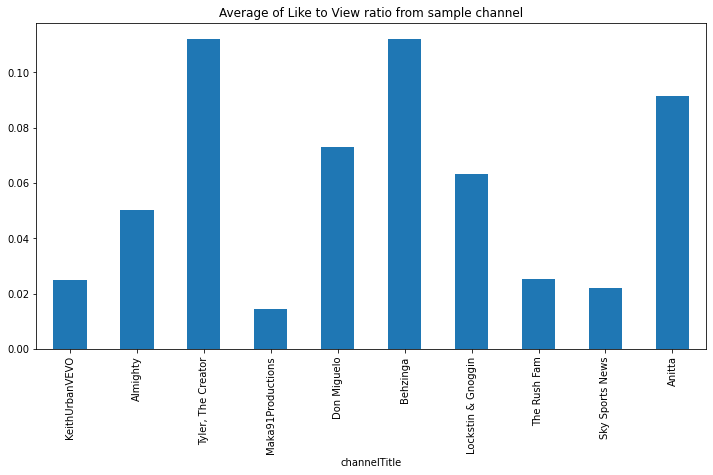

In [ ]:
# plot sample channel
train_clean.groupby('channelTitle')['target'].mean().sample(10).plot(kind='bar',figsize=(12,6))
plt.title('Average of Like to View ratio from sample channel')
plt.show();

Here we can see that different channel has different Like to View ratio, so we will add collumn with numeric data type that represent the channel

###Channel summary

The test dataset doesnt have likes, dislikes, comment_count and target. So we will try to fill the channel summary from train dataset

In [ ]:
# check if there is channel that in test dataset but not in train dataset
set(test_clean['channelTitle']).difference(train_clean['channelTitle'])

{'102.7KIISFM',
 '15MOFERADIO',
 'AYO Fishing',
 'Abdullah Ali Shorts',
 'AlishaMarieVlogs',
 'Amee Glam',
 'Ana Natalia',
 'Andrea Subotic',
 'Andrew Lowe',
 'Andy Jiang',
 'Ansley Spinks',
 'Anthony S. Ferraro @asfvision',
 'Autumn!',
 'B. Dylan Hollis',
 'BABY SMILE',
 'BBC Newsround',
 'BE AMAZED',
 'BabyZone',
 'Banden',
 'Battlestate',
 'Baxtrix',
 'Beauty Pageants',
 'Best Affordable Beauty Products',
 'BlueStopSign',
 'Brady Brandwood',
 "Brandon's Vlogs",
 'Braxophone',
 'Brendenlmao',
 'Brianna Mizura',
 'Brooklynne Webb',
 'Buhllistic',
 'CACTUS_BALLOON',
 'CG5LIVE',
 'CThaGod',
 'Caitlin Reilly',
 'Caleb Hyles',
 'Carlo and Sarah',
 'Cat Keenan',
 'Ceeday',
 'Chance Dubinick',
 'Chloe Rose Art',
 'Chris Hallbeck',
 'Cloutom',
 'Connor And Liana',
 'Corey Funk',
 'Dagwummy',
 'Daniel Iles',
 'Daniel Ricciardo',
 "Daniel's Wall",
 'DashieXP',
 'Dattboi',
 'David Alvareeezy',
 'Deshae Frost',
 'Detroit Lions',
 'Directed By Jibrizy',
 'Dpeezy 2099',
 'Dr Karan',
 'Dr. Glaucomf

In [ ]:
# check channel Amee Glam in test dataset
test_clean[test_clean['channelTitle']=='Amee Glam']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,thumbnail_link,comments_disabled,...,has_thumbnail,isTest,ordinal_trending_date,ordinal_publish_date,days_published,target_average_category,likes_average_category,dislikes_average_category,views_average_category,comment_average_category
105,q6ILaQY2j8g,Makeup tips & tricks 🔥 #Shorts .(5),2021-11-28 19:50:00+00:00,UCRiLCKIJStni8qLaF7RTIiA,Amee Glam,22,2021-12-01 00:00:00+00:00,NaN,https://i.ytimg.com/vi/q6ILaQY2j8g/default.jpg,False,...,False,True,738125,738122,2,0.067797,131517.598514,3656.724286,2.161102e+06,8992.710563
348,q6ILaQY2j8g,Makeup tips & tricks 🔥 #Shorts .(5),2021-11-28 19:50:00+00:00,UCRiLCKIJStni8qLaF7RTIiA,Amee Glam,22,2021-12-02 00:00:00+00:00,NaN,https://i.ytimg.com/vi/q6ILaQY2j8g/default.jpg,False,...,False,True,738126,738122,3,0.067797,131517.598514,3656.724286,2.161102e+06,8992.710563


In [ ]:
# check channel Amee Glam in train dataset
train_clean[train_clean['channelTitle']=='Amee Glam']

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,...,has_thumbnail,target,ordinal_trending_date,ordinal_publish_date,days_published,target_average_category,likes_average_category,dislikes_average_category,views_average_category,comment_average_category


Unfortunately we cant copy data from train dataset to test dataset because there is 232 channel (about 25% of test dataset) with null value. So we will not add channel summary collumn.

##by tag

In [ ]:
# check total unique tag
tag = train_clean['tags'].dropna()
tag_counts = {}
for i in tag:
    for j in i.split('|'):
      if j not in tag_counts:
        tag_counts[j.lower()]=1
      else:
        tag_counts[j.lower()] +=1

In [ ]:
len(tag_counts)

103450

Limitation to boolean since too many tag

In [ ]:
# add new collumn
train_clean['has_tag'] = train_clean['tags'].copy()
train_clean['has_tag'].fillna('is not',inplace=True)

In [ ]:
train_clean['has_tag'] = [False if x == 'is not' else True for x in train_clean['has_tag']]

In [ ]:
train_clean['has_tag'].value_counts()

True     78366
False    13465
Name: has_tag, dtype: int64

In [ ]:
# do it to test dataset
test_clean['has_tag'] = test_clean['tags'].copy()
test_clean['has_tag'].fillna('is not',inplace=True)
test_clean['has_tag'] = [False if x == 'is not' else True for x in test_clean['has_tag']]

##has description

To process 'description' collumn we must do Natural Language Processing. Since we are focusing in regression we will change 'description' collumn into boolean.

In [ ]:
# add new collumn
train_clean['has_description'] = train_clean['description'].copy()
train_clean['has_description'].fillna('is not',inplace=True)

In [ ]:
train_clean['has_description'] = [False if x == 'is not' else True for x in train_clean['has_description']]

In [ ]:
train_clean['has_description'].value_counts()

True     90375
False     1456
Name: has_description, dtype: int64

In [ ]:
# add to test dataset
test_clean['has_description'] = test_clean['description'].copy()
test_clean['has_description'].fillna('is not',inplace=True)
test_clean['has_description'] = [False if x == 'is not' else True for x in test_clean['has_description']]

#used feature

In [ ]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91831 entries, 0 to 92274
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   video_id                   91831 non-null  object             
 1   title                      91831 non-null  object             
 2   publishedAt                91831 non-null  datetime64[ns, UTC]
 3   channelId                  91831 non-null  object             
 4   channelTitle               91831 non-null  object             
 5   categoryId                 91831 non-null  int64              
 6   trending_date              91831 non-null  datetime64[ns, UTC]
 7   tags                       78366 non-null  object             
 8   view_count                 91831 non-null  int64              
 9   likes                      91831 non-null  int64              
 10  dislikes                   91831 non-null  int64              
 11  co

In [ ]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5582 entries, 0 to 5799
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   video_id                   5582 non-null   object             
 1   title                      5582 non-null   object             
 2   publishedAt                5582 non-null   datetime64[ns, UTC]
 3   channelId                  5582 non-null   object             
 4   channelTitle               5582 non-null   object             
 5   categoryId                 5582 non-null   int64              
 6   trending_date              5582 non-null   datetime64[ns, UTC]
 7   tags                       4289 non-null   object             
 8   thumbnail_link             5582 non-null   object             
 9   comments_disabled          5582 non-null   bool               
 10  ratings_disabled           5582 non-null   bool               
 11  desc

In [ ]:
# check different collumn
set(list(train_clean.columns)).symmetric_difference(list(test_clean.columns))

{'comment_count', 'dislikes', 'isTest', 'likes', 'target', 'view_count'}

In [ ]:
# drop different collumn in train dataset
train_clean.drop(['comment_count','dislikes','likes','view_count'], axis=1,inplace=True)

In [ ]:
# drop different collumn in test dataset
test_clean.drop(['isTest'], axis=1,inplace=True)

In [ ]:
# check collumn
train_clean.select_dtypes('object').columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'tags',
       'thumbnail_link', 'description', 'id'],
      dtype='object')

In [ ]:
# drop collumn with object datatype in train dataset
train_clean.drop(['video_id', 'title', 'channelId', 'channelTitle', 'tags','thumbnail_link', 'description', 'id','trending_date','publishedAt'], axis=1,inplace=True)

In [ ]:
# check collumn
test_clean.select_dtypes('object').columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'tags',
       'thumbnail_link', 'description', 'id'],
      dtype='object')

In [ ]:
# drop collumn with object datatype in train dataset
test_clean.drop(['video_id', 'title', 'channelId', 'channelTitle', 'tags','thumbnail_link', 'description', 'id','trending_date','publishedAt'], axis=1,inplace=True)

In [ ]:
# save to csv
train_clean.to_csv('youtube_train_clean.csv',index = False)
test_clean.to_csv('youtube_test_clean.csv',index = False)

#modelling

In [ ]:
# final dataframe
df_train = pd.read_csv('youtube_train_clean.csv')
df_test = pd.read_csv('youtube_test_clean.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91831 entries, 0 to 91830
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   categoryId                 91831 non-null  int64  
 1   comments_disabled          91831 non-null  bool   
 2   ratings_disabled           91831 non-null  bool   
 3   duration_seconds           91831 non-null  float64
 4   has_thumbnail              91831 non-null  bool   
 5   target                     91831 non-null  float64
 6   ordinal_trending_date      91831 non-null  int64  
 7   ordinal_publish_date       91831 non-null  int64  
 8   days_published             91831 non-null  int64  
 9   target_average_category    91831 non-null  float64
 10  likes_average_category     91831 non-null  float64
 11  dislikes_average_category  91831 non-null  float64
 12  views_average_category     91831 non-null  float64
 13  comment_average_category   91831 non-null  flo

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5582 entries, 0 to 5581
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   categoryId                 5582 non-null   int64  
 1   comments_disabled          5582 non-null   bool   
 2   ratings_disabled           5582 non-null   bool   
 3   duration_seconds           5565 non-null   float64
 4   has_thumbnail              5582 non-null   bool   
 5   ordinal_trending_date      5582 non-null   int64  
 6   ordinal_publish_date       5582 non-null   int64  
 7   days_published             5582 non-null   int64  
 8   target_average_category    5582 non-null   float64
 9   likes_average_category     5582 non-null   float64
 10  dislikes_average_category  5582 non-null   float64
 11  views_average_category     5582 non-null   float64
 12  comment_average_category   5582 non-null   float64
 13  has_tag                    5582 non-null   bool 

In [ ]:
# model
import lightgbm as lgb
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train.drop(columns='target')
y = df_train['target']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_lgb = lgb.LGBMRegressor()
model_xgb = xgb.XGBRegressor()
model_lr = LinearRegression()
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor()

In [ ]:
model_lgb.fit(X_train,y_train)
model_xgb.fit(X_train,y_train)
model_lr.fit(X_train,y_train)
model_dt.fit(X_train,y_train)
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_lgb = model_lgb.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

#evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('LightGBM r2 score:', r2_score(y_test, y_pred_lgb))
print('XGBoost r2 score:', r2_score(y_test, y_pred_xgb))
print('Linear Regression r2 score:', r2_score(y_test, y_pred_lr))
print('Decision Tree r2 score:', r2_score(y_test, y_pred_dt))
print('Random Forest Regressor r2 score:', r2_score(y_test, y_pred_rf))

LightGBM r2 score: 0.3686692719795034
XGBoost r2 score: 0.6648922938993144
Linear Regression r2 score: 0.23236725754985277
Decision Tree r2 score: 0.26894127607238827
Random Forest Regressor r2 score: 0.5612138511047717


XGboost has highest score, so we will use that

#tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# create parameter
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [ ]:
# looking for best parameter
xgbr = xgb.XGBRegressor()
xgbr_random = RandomizedSearchCV(estimator=xgbr,
                                param_distributions=params,
                                scoring='neg_mean_squared_error',
                                n_iter=25,
                                verbose=1)

xgbr_random.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=25,
                   param_distributions={'colsample_byl

In [ ]:
xgbr_random.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 1000,
 'max_depth': 20,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.4}

In [ ]:
# xgb regressor with tuning parameter
xgbr_tuning = xgb.XGBRegressor(subsample= 0.8999999999999999,
                               n_estimators= 1000,
                               max_depth= 20,
                               learning_rate= 0.1,
                               colsample_bytree= 0.7,
                               colsample_bylevel= 0.4)

In [ ]:
xgbr_tuning.fit(X_train,y_train)

[10:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bylevel=0.4, colsample_bytree=0.7, max_depth=20,
             n_estimators=1000, subsample=0.8999999999999999)

In [ ]:
y_tuning_xgb = xgbr_tuning.predict(X_test)

In [ ]:
print('XGB regressor r2 score:', r2_score(y_test, y_pred_xgb))
print('Tuning XGB regressor r2 score:', r2_score(y_test, y_tuning_xgb))

XGB regressor r2 score: 0.6648922938993144
Tuning XGB regressor r2 score: 0.8412514934587818


We get about 30% improvement, so we will use the model with hyperparameter tuning

In [ ]:
actual = pd.DataFrame(y_test).reset_index()
result = list(y_tuning_xgb)
results = pd.DataFrame(result,columns=['target'])

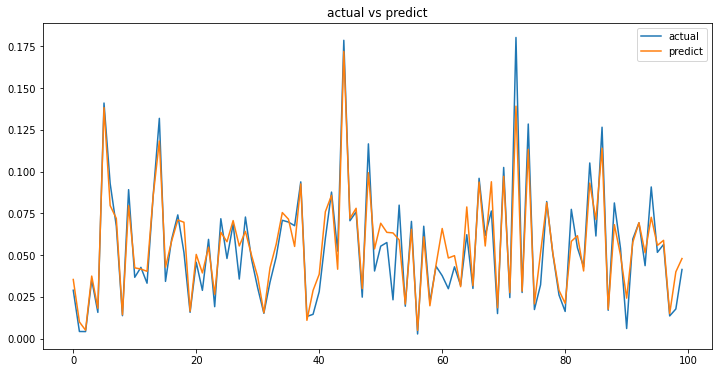

In [ ]:
actual['target'].head(100).plot(figsize=(12,6),label='actual')
results['target'].head(100).plot(figsize=(12,6),label='predict')
plt.title('actual vs predict')
plt.legend();

From the graph we can see that the distance between actual and predict value is closed. With good r2 score we can say that the model able to predict Like to View Ratio of YouTube Videos

#predicting

In [ ]:
xgb_final = xgb.XGBRegressor(subsample= 0.8999999999999999,
                               n_estimators= 1000,
                               max_depth= 20,
                               learning_rate= 0.1,
                               colsample_bytree= 0.7,
                               colsample_bylevel= 0.4)

In [ ]:
# fit all train dataset
xgb_final.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.4,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=20, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8999999999999999,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
# predict test dataset
prediction = xgb_final.predict(df_test)
df_test['target'] = prediction

#summary

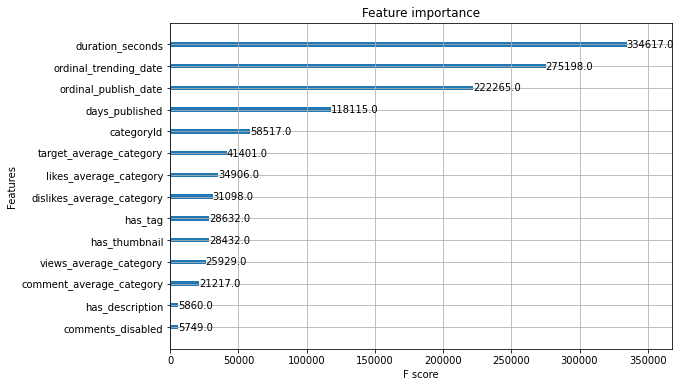

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (9, 6)
plot_importance(xgb_final);

Duration and variable related to date has highest significance. So we can focus on those variable to explained Like to View ratio of Youtube Videos.

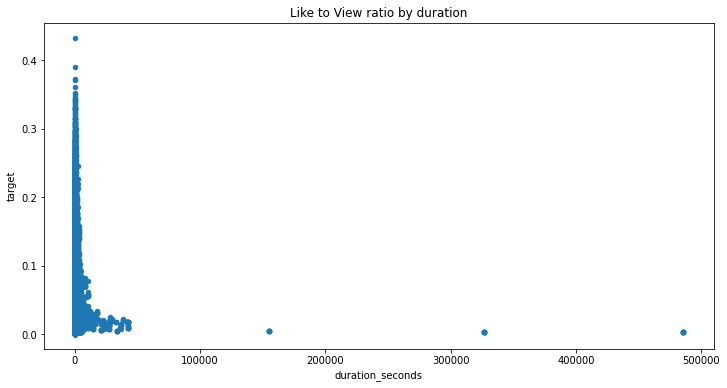

In [ ]:
# Duration variables
train_clean.plot.scatter(x='duration_seconds',y='target',figsize=(12,6))
plt.title('Like to View ratio by duration');

Looks like 'Shorts' have better Like to View ratio.

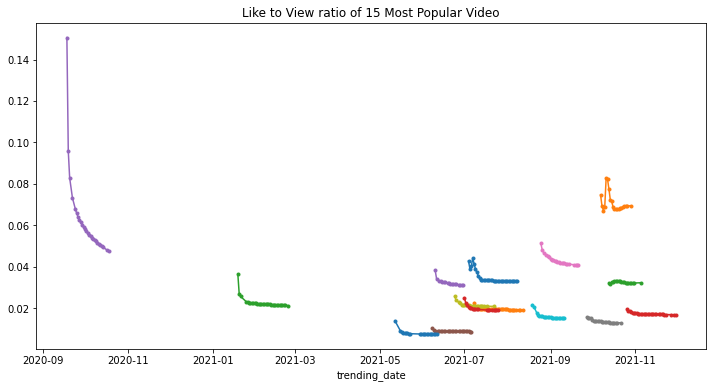

In [ ]:
for i in range(15):
    popular_video = train_clean['video_id'].value_counts().index[i]
    train_clean.query('video_id ==@popular_video').set_index('trending_date')['target'].plot(figsize=(12,6),style='.-',title='Like to View ratio of 15 Most Popular Video');

Ratio of likes and views will decrease after being published and then become stable. Looking into YouTube notification system, the one that likely to watch the video on the same date it was uploaded is the subscriber. Since they already like the channel, most likely they will like the video.

So we need to schedule the upload date according to the active time of the subscriber.

In [ ]:
df_test.to_csv('youtube_result.csv',index=False)